In [1]:
#!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
appointments = pd.read_csv('appointment_data.csv')
#appointments = pd.read_csv('appointment_data.csv', na_values=['', ' '])
#appointments = appointments.replace(['', ' '], [np.nan, np.nan])

## Split del dataset in train e test (train/test.csv) e salvataggio su disco

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_data, test_data = train_test_split(appointments, train_size=0.8, test_size=0.2, random_state=9)

In [6]:
print(train_data.shape)
print(test_data.shape)

(70736, 14)
(17685, 14)


In [7]:
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

## Data exploration

In [8]:
appointments.shape

(88421, 14)

In [9]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No-show         88421 non-null  object 
 1   PatientId       88421 non-null  float64
 2   AppointmentID   88421 non-null  int64  
 3   Gender          88421 non-null  object 
 4   ScheduledDay    88421 non-null  object 
 5   AppointmentDay  88421 non-null  object 
 6   Age             88421 non-null  int64  
 7   Neighbourhood   88421 non-null  object 
 8   Scholarship     88421 non-null  int64  
 9   Hipertension    88421 non-null  int64  
 10  Diabetes        88421 non-null  int64  
 11  Alcoholism      88421 non-null  int64  
 12  Handcap         88421 non-null  int64  
 13  SMS_received    88421 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 9.4+ MB


In [10]:
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,8.842100e+04,8.842100e+04,88421.000000,88421.000000,88421.000000,88421.000000,88421.000000,88421.000000,88421.000000
mean,1.484798e+14,5.675391e+06,37.124631,0.099230,0.198064,0.072324,0.030638,0.022393,0.321553
std,2.570830e+14,7.133018e+04,23.104321,0.298972,0.398543,0.259026,0.172335,0.162529,0.467075
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.166843e+12,5.640477e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.212196e+13,5.680756e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.464814e+13,5.725565e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790481e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
appointments.head(10)

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,1.328492e+12,5687610,F,2016-05-11T16:00:16Z,2016-05-19T00:00:00Z,25,MATA DA PRAIA,0,0,0,0,0,0
1,No,3.881869e+14,5694484,M,2016-05-13T08:41:27Z,2016-05-17T00:00:00Z,62,FRADINHOS,0,0,0,0,0,0
2,Yes,9.118992e+12,5500939,F,2016-03-22T11:09:38Z,2016-05-09T00:00:00Z,65,JARDIM CAMBURI,0,0,0,0,0,0
3,No,1.843618e+14,5639080,M,2016-04-29T08:42:15Z,2016-04-29T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0
4,No,5.783198e+13,5671566,M,2016-05-06T18:47:52Z,2016-05-09T00:00:00Z,61,MARUÍPE,0,1,0,1,0,0
5,No,6.516246e+13,5600056,F,2016-04-19T09:52:22Z,2016-05-16T00:00:00Z,11,DO QUADRO,1,0,0,0,0,0
6,No,6.559800e+12,5640931,M,2016-04-29T11:44:39Z,2016-05-04T00:00:00Z,45,CRUZAMENTO,0,0,0,0,0,1
7,No,1.432925e+12,5730450,M,2016-05-24T08:37:44Z,2016-06-07T00:00:00Z,9,MÁRIO CYPRESTE,0,0,0,0,0,1
8,No,9.741488e+14,5771325,M,2016-06-03T12:24:24Z,2016-06-03T00:00:00Z,79,SOLON BORGES,0,0,0,0,0,0
9,No,5.458152e+12,5671279,M,2016-05-06T16:09:35Z,2016-05-10T00:00:00Z,60,TABUAZEIRO,0,1,0,0,0,1


Ci sono molti più pazienti che non si presentano all'appuntamento

Text(0.5, 1.0, 'showed up patients')

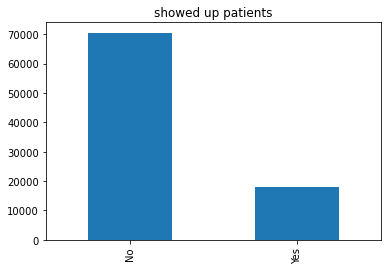

In [12]:
appointments['No-show'].value_counts().plot(kind='bar').set_title('showed up patients')

Controllo i possibili valori assunti dalle feature, ricordando lo shape del dataset

In [13]:
appointments.shape

(88421, 14)

In [14]:
appointments.nunique()

No-show               2
PatientId         54105
AppointmentID     88421
Gender                2
ScheduledDay      83840
AppointmentDay       27
Age                 103
Neighbourhood        81
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               5
SMS_received          2
dtype: int64

Gli ID dei pazienti non sono univoci. E' tuttavia consentito che un paziente prenoti più visite, e sembrerebbe essere così. La maggior parte dei pazienti fa una sola visita, e i pazienti con più visite ciascuno sono molti di meno

Text(0.5, 0, 'Number of times a PatientID appears in the data')

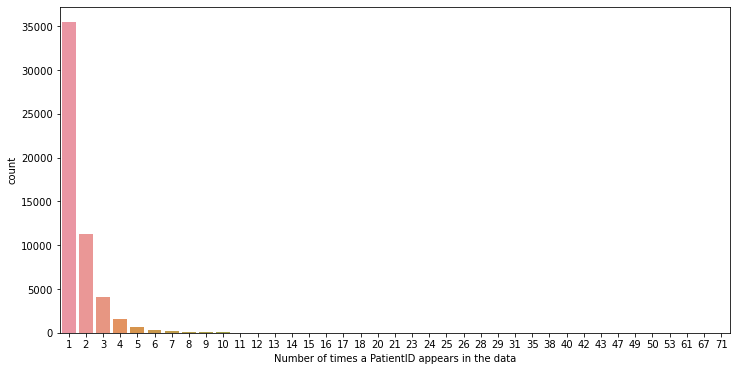

In [15]:
fig = plt.figure(figsize=(12,6))
sns.countplot(appointments.PatientId.value_counts())
plt.xlabel('Number of times a PatientID appears in the data')

Ci sono alcuni ID dei pazienti che non sono formattati correttamente (5 rows). Da convertire in interi per conservare le osservazioni/feature

In [16]:
appointments.PatientId.apply(float.is_integer).sum()

88416

In [17]:
appointments[appointments.PatientId.apply(float.is_integer) == False]

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
29449,No,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0
49021,No,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0
52650,No,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0
75314,No,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1
79477,No,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0


Gli AppointmentID sono invece univoci

In [18]:
appointments.AppointmentID.value_counts()

5769215    1
5767893    1
5698251    1
5688012    1
5685965    1
          ..
5545273    1
5541179    1
5682492    1
5684541    1
5771266    1
Name: AppointmentID, Length: 88421, dtype: int64

In [19]:
appointments.Gender.unique()

array(['F', 'M'], dtype=object)

Alcuni valori di età sono pari a 0, potrebbero essere valori mancanti (quasi certamente, oppure visite a neonati?)

In [20]:
appointments.Age.value_counts()

0      2820
1      1811
52     1401
38     1320
2      1316
       ... 
98        6
100       4
115       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

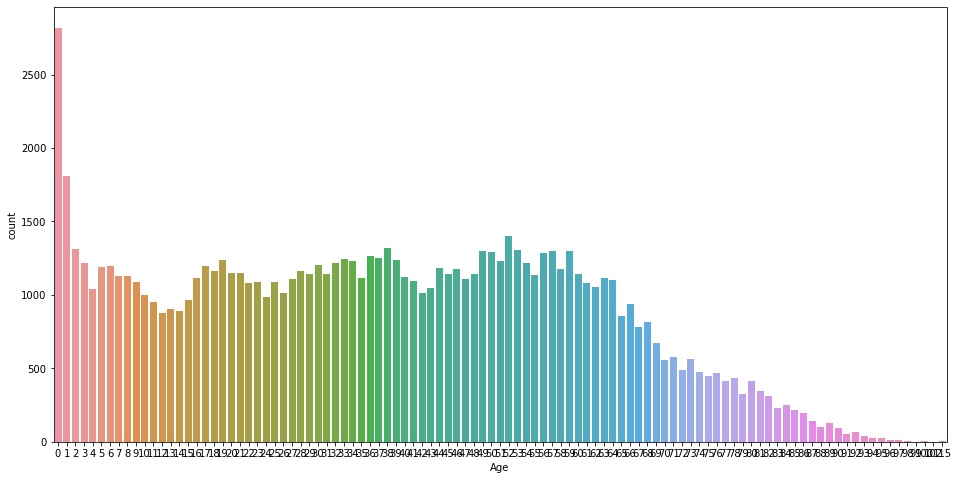

In [21]:
fig = plt.figure(figsize=(16,8))
chart = sns.countplot(appointments.Age)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

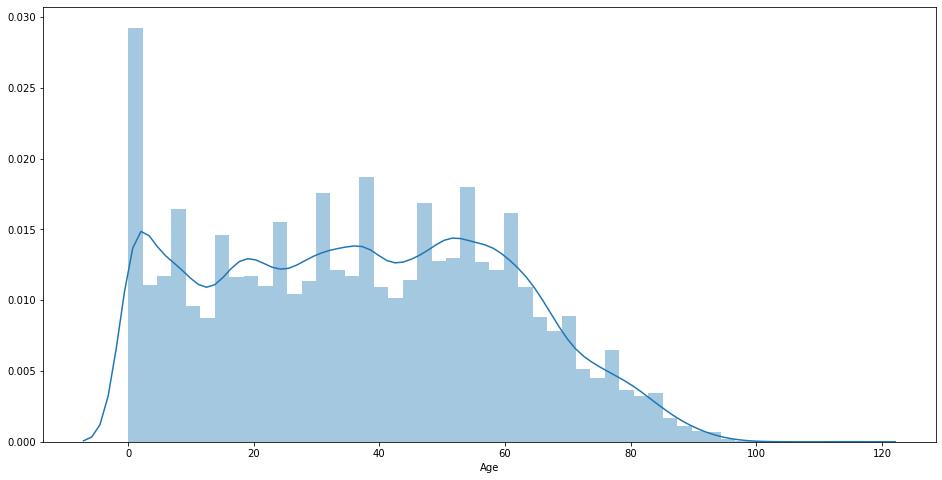

In [22]:
fig = plt.figure(figsize=(16,8))
chart = sns.distplot(appointments.Age)

Il valore di età pari a 0 sembra corrispondere a neonati, in quanto il numero di questi pazienti è ridotto (2820 su 88k) e nessuno di loro ha nelle colonne Hipertension, Diabetes, Alcoholism un valore di 1.

Nessuno di loro ha un valore diverso da 0 per quanto riguarda Handcap, e ciò potrebbe essere perché è effettivamente la prima visita del neonato (dove potrebbe essere diagnosticato).

In [23]:
appointments[appointments['Age'] == 0].shape

(2820, 14)

In [24]:
appointments[appointments['Age'] == 0][['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].sum()

Scholarship      43
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received    729
dtype: int64

I valori del quartiere della visita sono corretti (senza nulli o altro). Hanno anche una certa distribuzione.

In [25]:
print(sorted(appointments.Neighbourhood.unique()))
print(appointments.Neighbourhood.nunique())

['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO', 'SANTA CECÍLIA', 'SANTA CLARA', 'SANTA HELENA', 'SANTA

In [26]:
appointments.Neighbourhood.value_counts()

JARDIM CAMBURI                 6208
MARIA ORTIZ                    4603
RESISTÊNCIA                    3564
JARDIM DA PENHA                3093
ITARARÉ                        2810
                               ... 
ILHA DO BOI                      30
ILHA DO FRADE                     8
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

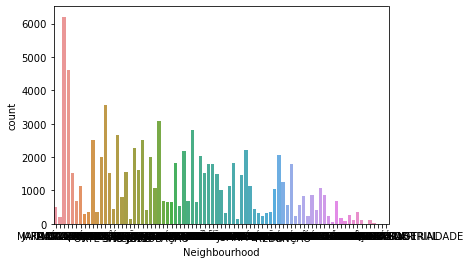

In [27]:
sns.countplot(appointments.Neighbourhood)

In [28]:
appointments.Scholarship.unique()

array([0, 1], dtype=int64)

In [29]:
appointments.Hipertension.unique()

array([0, 1], dtype=int64)

In [30]:
appointments.Diabetes.unique()

array([0, 1], dtype=int64)

In [31]:
appointments.Alcoholism.unique()

array([0, 1], dtype=int64)

In [32]:
appointments.SMS_received.unique()

array([0, 1], dtype=int64)

I valori della feature Handcap sono 5 diversi (0,1,2,3,4), forse categorici. Cosa rappresenterebbero? La percentuale di disabilità?

In [33]:
appointments.Handcap.unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [34]:
appointments.Handcap.value_counts()

0    86621
1     1637
2      149
3       11
4        3
Name: Handcap, dtype: int64

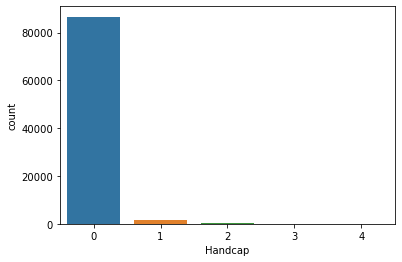

In [35]:
sns.countplot(appointments.Handcap)

## Alcune modifiche di preprocessing

In [36]:
app_edit = appointments.replace(['Yes', 'No'], [1, 0])

In [37]:
app_edit.dtypes

No-show             int64
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
dtype: object

In [38]:
app_edit = app_edit.replace(['', ' '], [np.nan, np.nan])

In [39]:
app_edit.isnull().sum().sum()

0

In [40]:
app_edit = app_edit.drop(columns=['AppointmentID'])

In [41]:
app_edit = app_edit.replace(['M', 'F'], [0, 1])

## Analisi rispetto alla probabilità di No-show

La correlation matrix delle feature è ancora incompleta, vanno prima convertite in valori interi

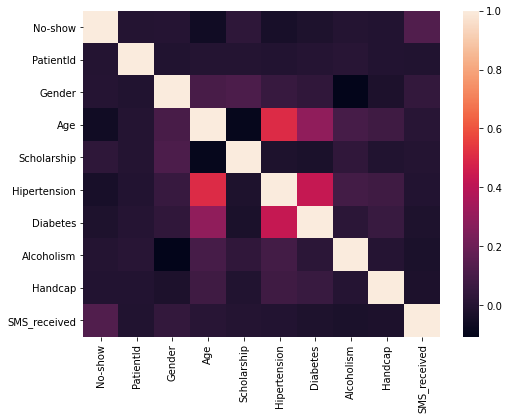

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(app_edit.corr(), annot=False)
plt.show()

### Gender

Risulta ininfluente sulla probabilità di No-show, drop

,No-show
Gender,
1,0.203753
0,0.199425


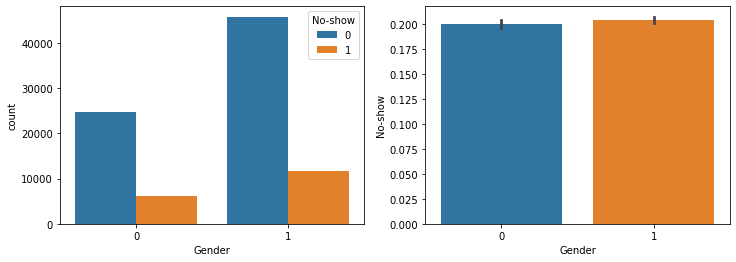

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Gender', hue='No-show', data=app_edit, ax=ax[0])
app_edit[['Gender', 'No-show']].groupby(['Gender']).count().sort_values(by='No-show', ascending=False)

sns.barplot(x='Gender', y='No-show', data=app_edit, ax=ax[1])
app_edit[['Gender', 'No-show']].groupby(['Gender']).mean().sort_values(by='No-show', ascending=False)

### Age

Nell'intervallo 15-35 anni sembra essere più alta la probabilità, seppur non di molto. Viceversa dai 45 anni in poi è meno probabile che il paziente non si presenti alla visita (anche a 0 anni, prima visita obbligatoria?).

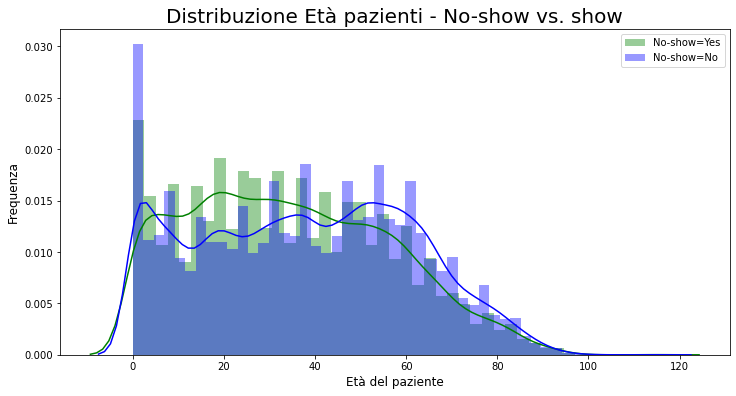

In [44]:
fig = plt.figure(figsize=(12,6))
axis = sns.distplot(app_edit.loc[(app_edit['No-show'] == 1),'Age'] , color='g', label='No-show=Yes')
axis = sns.distplot(app_edit.loc[(app_edit['No-show'] == 0),'Age'] , color='b', label='No-show=No')
plt.title('Distribuzione Età pazienti - No-show vs. show', fontsize = 20)
plt.legend()
plt.xlabel("Età del paziente", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

### Tempo in giorni prima di effettuare la visita (tempo tra prenotazione e visita)

All'aumentare dei giorni di attesa aumenta anche la probabilità di No-show. Da notare come nel dataset ci siano valori negativi, corrispondenti ad appuntamenti fissati "indietro nel tempo", tutti con No-show. Può essere opportuno aggiungere una feature per segnalare questi casi (1/0 se avviene o meno)

In [45]:
app_edit_date = app_edit.astype({'ScheduledDay': 'datetime64[D]', 'AppointmentDay': 'datetime64[D]'})

In [46]:
col_datediff = app_edit_date['AppointmentDay'] - app_edit_date['ScheduledDay']
col_datediff = col_datediff.astype('timedelta64[D]')
col_datediff = col_datediff.astype('int64')
col_datediff

0         8
1         4
2        48
3         0
4         3
         ..
88416     5
88417    36
88418     6
88419     0
88420    12
Length: 88421, dtype: int64

In [47]:
col_datediff.unique()

array([  8,   4,  48,   0,   3,  27,   5,  14,  28,  64,   2,  18,   6,
        19,  34,  33,  15,  17,  11,  21,  13,   7,  26, 155,  32,   1,
        31,  69,   9,  12,  16,  24,  38,  36,  20,  50,  30,  35,  29,
        37,  25,  42,  66,  23,  49,  22,  56,  10,  41,  43,  47,  91,
        75,  61,  57,  65,  40,  62,  45,  53,  68,  76,  63,  52,  46,
        58,  39,  51,  85, 102,  55,  84,  60,  90,  71,  70,  88,  78,
        67,  44,  59, 179,  89,  74,  77,  87,  54, 115,  73, 169,  79,
        81,  80,  93, 108, 107,  72, 111, 104, 139,  86,  92, 176, 132,
       133,  97,  83,  98,  95, 105, 119, 142, 112, 162,  94,  96, 122,
       126, 151, 125, 109, 123, 103,  -1, 127,  -6, 101, 110,  82, 146],
      dtype=int64)

In [48]:
app_edit_daydiff = app_edit_date
app_edit_daydiff['DaysToAppointment'] = col_datediff

In [49]:
app_edit_daydiff[app_edit_daydiff['DaysToAppointment'] < 0]

,No-show,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysToAppointment
53716,1,7.839273e+12,0,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,-1
60856,1,9.982316e+14,1,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,-6
70097,1,2.425226e+13,1,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,-1


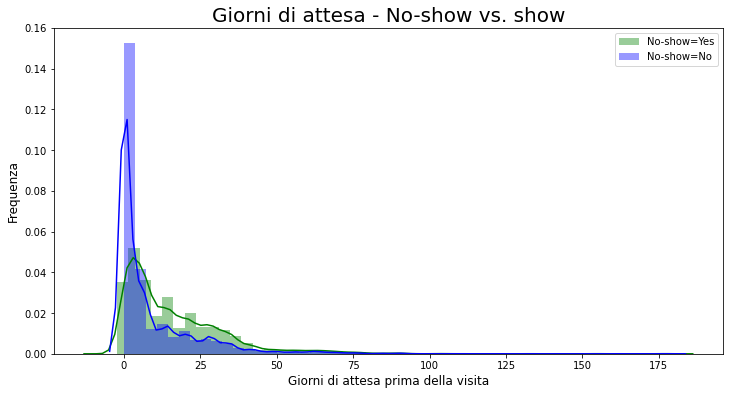

In [50]:
fig = plt.figure(figsize=(12,6))
axis = sns.distplot(app_edit_daydiff.loc[(app_edit['No-show'] == 1),'DaysToAppointment'] , color='g', label='No-show=Yes')
axis = sns.distplot(app_edit_daydiff.loc[(app_edit['No-show'] == 0),'DaysToAppointment'] , color='b', label='No-show=No')
plt.title('Giorni di attesa - No-show vs. show', fontsize = 20)
plt.legend()
plt.xlabel("Giorni di attesa prima della visita", fontsize = 12)
plt.ylabel('Frequenza', fontsize = 12);

### Giorno della settimane dell'appuntamento e dello schedule

.

In [51]:
app_edit_daydiff.head()

,No-show,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysToAppointment
0,0,1.328492e+12,1,2016-05-11,2016-05-19,25,MATA DA PRAIA,0,0,0,0,0,0,8
1,0,3.881869e+14,0,2016-05-13,2016-05-17,62,FRADINHOS,0,0,0,0,0,0,4
2,1,9.118992e+12,1,2016-03-22,2016-05-09,65,JARDIM CAMBURI,0,0,0,0,0,0,48
3,0,1.843618e+14,0,2016-04-29,2016-04-29,41,MARIA ORTIZ,0,0,0,0,0,0,0
4,0,5.783198e+13,0,2016-05-06,2016-05-09,61,MARUÍPE,0,1,0,1,0,0,3


In [52]:
app_edit_daydiff['AppointmentDay'] = app_edit_daydiff['AppointmentDay'].dt.dayofweek
app_edit_daydiff.head()

,No-show,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysToAppointment
0,0,1.328492e+12,1,2016-05-11,3,25,MATA DA PRAIA,0,0,0,0,0,0,8
1,0,3.881869e+14,0,2016-05-13,1,62,FRADINHOS,0,0,0,0,0,0,4
2,1,9.118992e+12,1,2016-03-22,0,65,JARDIM CAMBURI,0,0,0,0,0,0,48
3,0,1.843618e+14,0,2016-04-29,4,41,MARIA ORTIZ,0,0,0,0,0,0,0
4,0,5.783198e+13,0,2016-05-06,0,61,MARUÍPE,0,1,0,1,0,0,3


,No-show
AppointmentDay,
2016-05-04T00:00:00Z,0.236277
2016-05-20T00:00:00Z,0.231884
2016-05-14T00:00:00Z,0.230769
2016-05-10T00:00:00Z,0.227763
2016-05-16T00:00:00Z,0.227560
2016-05-13T00:00:00Z,0.226782
2016-05-09T00:00:00Z,0.224263
2016-05-17T00:00:00Z,0.216600
2016-05-06T00:00:00Z,0.211208


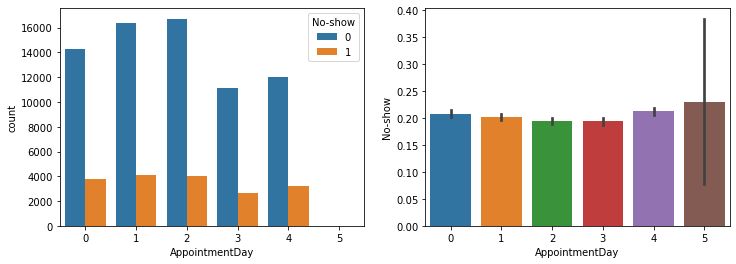

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='AppointmentDay', hue='No-show', data=app_edit_daydiff, ax=ax[0])
app_edit[['AppointmentDay', 'No-show']].groupby(['AppointmentDay']).count().sort_values(by='No-show', ascending=False)

sns.barplot(x='AppointmentDay', y='No-show', data=app_edit_daydiff, ax=ax[1])
app_edit[['AppointmentDay', 'No-show']].groupby(['AppointmentDay']).mean().sort_values(by='No-show', ascending=False)

In [54]:
app_edit_daydiff['ScheduledDay'] = app_edit_daydiff['ScheduledDay'].dt.dayofweek
app_edit_daydiff.head()

,No-show,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysToAppointment
0,0,1.328492e+12,1,2,3,25,MATA DA PRAIA,0,0,0,0,0,0,8
1,0,3.881869e+14,0,4,1,62,FRADINHOS,0,0,0,0,0,0,4
2,1,9.118992e+12,1,1,0,65,JARDIM CAMBURI,0,0,0,0,0,0,48
3,0,1.843618e+14,0,4,4,41,MARIA ORTIZ,0,0,0,0,0,0,0
4,0,5.783198e+13,0,4,0,61,MARUÍPE,0,1,0,1,0,0,3


,No-show
ScheduledDay,
2016-05-12T15:34:47Z,1.0
2016-04-27T10:15:42Z,1.0
2016-04-27T10:01:20Z,1.0
2016-05-31T14:04:59Z,1.0
2016-04-27T10:00:07Z,1.0
...,...
2016-05-05T11:38:37Z,0.0
2016-05-05T11:38:41Z,0.0
2016-05-05T11:38:58Z,0.0


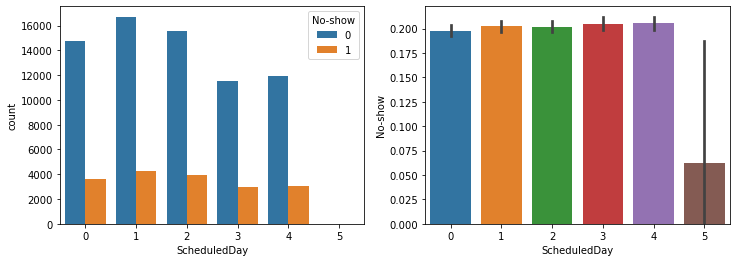

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='ScheduledDay', hue='No-show', data=app_edit_daydiff, ax=ax[0])
app_edit[['ScheduledDay', 'No-show']].groupby(['ScheduledDay']).count().sort_values(by='No-show', ascending=False)

sns.barplot(x='ScheduledDay', y='No-show', data=app_edit_daydiff, ax=ax[1])
app_edit[['ScheduledDay', 'No-show']].groupby(['ScheduledDay']).mean().sort_values(by='No-show', ascending=False)

### Scholarship

Ci sono pochi dati per chi ha una scolarship, anche se conviene mantenere la feature poiché c'è una lieve differenza di probabilità. Si potrebbe anche provare a fare un drop.

,No-show
Scholarship,
1,0.238318
0,0.198262


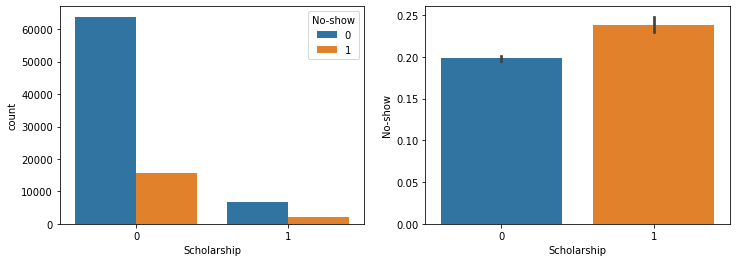

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Scholarship', hue='No-show', data=app_edit, ax=ax[0])
app_edit[['Scholarship', 'No-show']].groupby(['Scholarship']).count().sort_values(by='No-show', ascending=False)

sns.barplot(x='Scholarship', y='No-show', data=app_edit, ax=ax[1])
app_edit[['Scholarship', 'No-show']].groupby(['Scholarship']).mean().sort_values(by='No-show', ascending=False)

### Hipertension

.

,No-show
Hipertension,
0,0.209144
1,0.174271


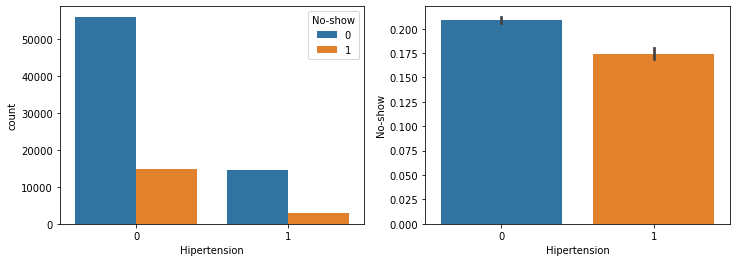

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Hipertension', hue='No-show', data=app_edit, ax=ax[0])
app_edit[['Hipertension', 'No-show']].groupby(['Hipertension']).count().sort_values(by='No-show', ascending=False)

sns.barplot(x='Hipertension', y='No-show', data=app_edit, ax=ax[1])
app_edit[['Hipertension', 'No-show']].groupby(['Hipertension']).mean().sort_values(by='No-show', ascending=False)

### Diabetes

.

,No-show
Diabetes,
0,0.204191
1,0.177170


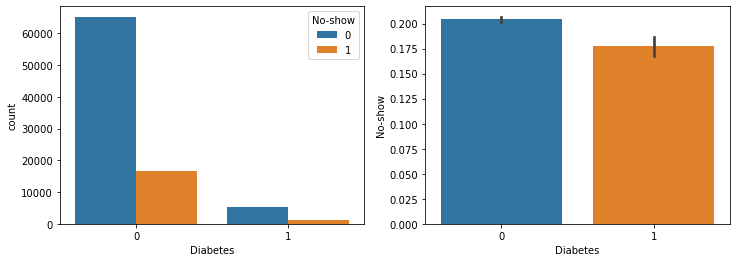

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Diabetes', hue='No-show', data=app_edit, ax=ax[0])
app_edit[['Diabetes', 'No-show']].groupby(['Diabetes']).count().sort_values(by='No-show', ascending=False)

sns.barplot(x='Diabetes', y='No-show', data=app_edit, ax=ax[1])
app_edit[['Diabetes', 'No-show']].groupby(['Diabetes']).mean().sort_values(by='No-show', ascending=False)

### Alcoholism

Ci sono pochi dati per chi dichiara di avere problemi di alcolismo (forse è difficile che venga dichiarato), e le probabilità sono molto simili tra loro. Ha senso fare un drop.

,No-show
Alcoholism,
0,0.202410
1,0.196752


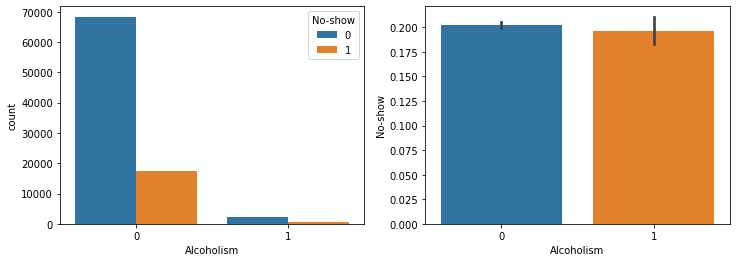

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Alcoholism', hue='No-show', data=app_edit, ax=ax[0])
app_edit[['Alcoholism', 'No-show']].groupby(['Alcoholism']).count().sort_values(by='No-show', ascending=False)

sns.barplot(x='Alcoholism', y='No-show', data=app_edit, ax=ax[1])
app_edit[['Alcoholism', 'No-show']].groupby(['Alcoholism']).mean().sort_values(by='No-show', ascending=False)

### Handicap

Ci sono pochissimi pazienti con handicap (1+). Intanto conviene raggrupparli in una classe singola, quindi specificando Yes/No binario, e ricontrollare le probabilità.

A seguito dell'aggregazione delle classi con 1+ handicap si nota una probabilità simile per yes/no di No-show, tuttavia non rilevante perché le osservazioni sono quasi la totalità relative a handicap 0. Da droppare.

,No-show
Handcap,
4,0.333333
2,0.234899
0,0.202618
3,0.181818
1,0.178986


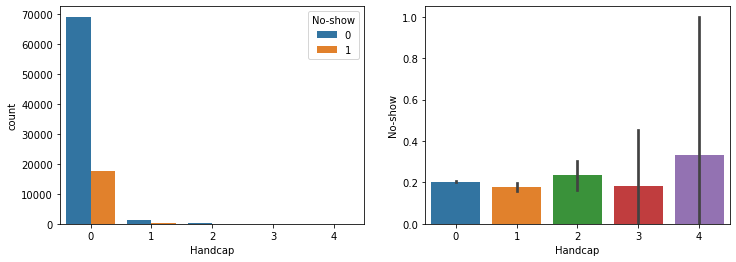

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Handcap', hue='No-show', data=app_edit, ax=ax[0])
app_edit[['Handcap', 'No-show']].groupby(['Handcap']).count().sort_values(by='No-show', ascending=False)

sns.barplot(x='Handcap', y='No-show', data=app_edit, ax=ax[1])
app_edit[['Handcap', 'No-show']].groupby(['Handcap']).mean().sort_values(by='No-show', ascending=False)

In [61]:
app_hcap = app_edit
app_hcap['Handcap'] = app_edit['Handcap'].apply(lambda x: int(not (x==0)))
app_hcap['Handcap'].value_counts()

0    86621
1     1800
Name: Handcap, dtype: int64

,No-show
Handcap,
0,0.202618
1,0.183889


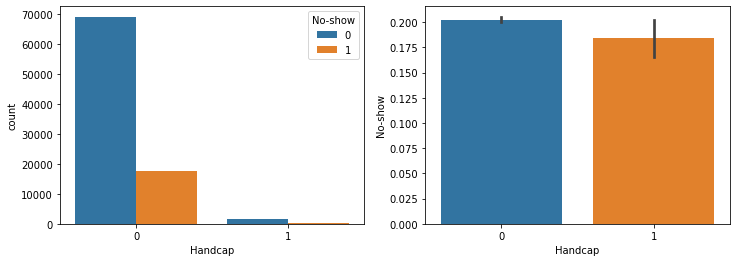

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Handcap', hue='No-show', data=app_edit, ax=ax[0])
app_edit[['Handcap', 'No-show']].groupby(['Handcap']).count().sort_values(by='No-show', ascending=False)

sns.barplot(x='Handcap', y='No-show', data=app_edit, ax=ax[1])
app_edit[['Handcap', 'No-show']].groupby(['Handcap']).mean().sort_values(by='No-show', ascending=False)

### SMS_received

C'è una lieve differenza di probabilità, ovvero chi ha ricevuto uno o più SMS ha più probabilità di No-show.

Nelle istruzioni è specificato che questa feature può assumere valori anche maggiori di 1. Sarebbe opportuno mappare questi valori sempre ad 1.

,No-show
SMS_received,
1,0.278032
0,0.166314


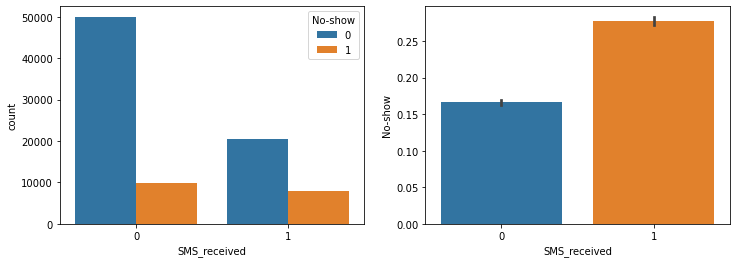

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='SMS_received', hue='No-show', data=app_edit, ax=ax[0])
app_edit[['SMS_received', 'No-show']].groupby(['SMS_received']).count().sort_values(by='No-show', ascending=False)

sns.barplot(x='SMS_received', y='No-show', data=app_edit, ax=ax[1])
app_edit[['SMS_received', 'No-show']].groupby(['SMS_received']).mean().sort_values(by='No-show', ascending=False)

### Neighbourhood

Alcuni hanno molti pazienti, altri pochi (con probabilità sballate). Conviene aggregarli in classi per i più rappresentati e scegliere una classe "Other" per quelli meno frequenti (o successivamente trovati nel train set come nuovi)

,No-show
Neighbourhood,
JARDIM CAMBURI,6208
MARIA ORTIZ,4603
RESISTÊNCIA,3564
JARDIM DA PENHA,3093
ITARARÉ,2810
...,...
ILHA DO BOI,30
ILHA DO FRADE,8
AEROPORTO,8


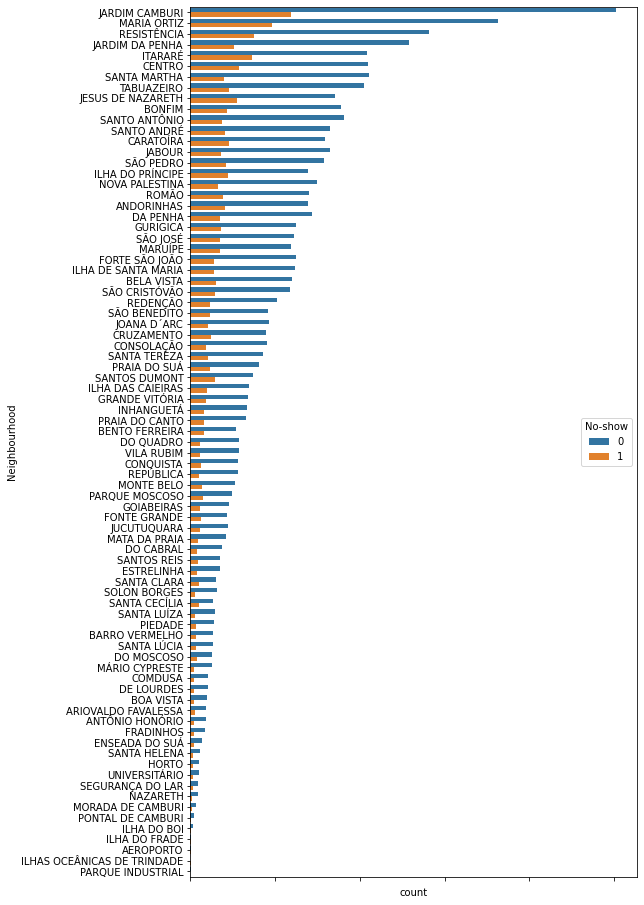

In [64]:
fig = plt.subplots(figsize=(8,16))

g = sns.countplot(y='Neighbourhood', hue='No-show', orient='h', data=app_edit, order = app_edit['Neighbourhood'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
#plt.setp(g.get_xticklabels(), rotation=45)
app_edit[['Neighbourhood', 'No-show']].groupby(['Neighbourhood']).count().sort_values(by='No-show', ascending=False)

JARDIM CAMBURI                 6208
MARIA ORTIZ                    4603
RESISTÊNCIA                    3564
JARDIM DA PENHA                3093
ITARARÉ                        2810
                               ... 
ILHA DO BOI                      30
ILHA DO FRADE                     8
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

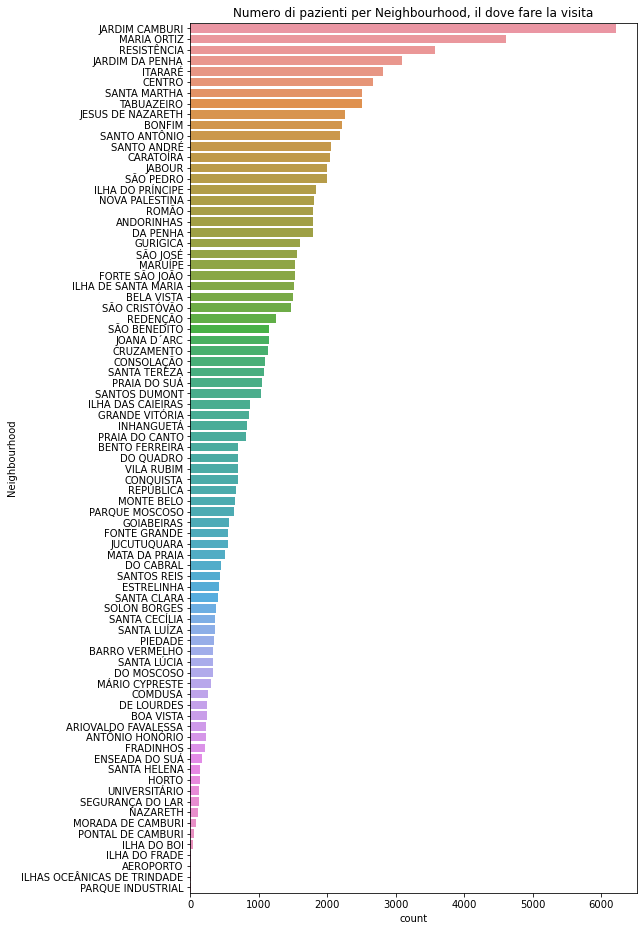

In [65]:
fig = plt.subplots(figsize=(8,16))

g = sns.countplot(y='Neighbourhood', orient='h', data=app_edit, order = app_edit['Neighbourhood'].value_counts().index)
g.set_title('Numero di pazienti per Neighbourhood, il dove fare la visita')
app_edit['Neighbourhood'].value_counts()

,No-show
Neighbourhood,
ILHAS OCEÂNICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.279455
SANTA CECÍLIA,0.260989
ITARARÉ,0.259786
HORTO,0.257353
...,...
PONTAL DE CAMBURI,0.148148
MÁRIO CYPRESTE,0.139456
AEROPORTO,0.125000


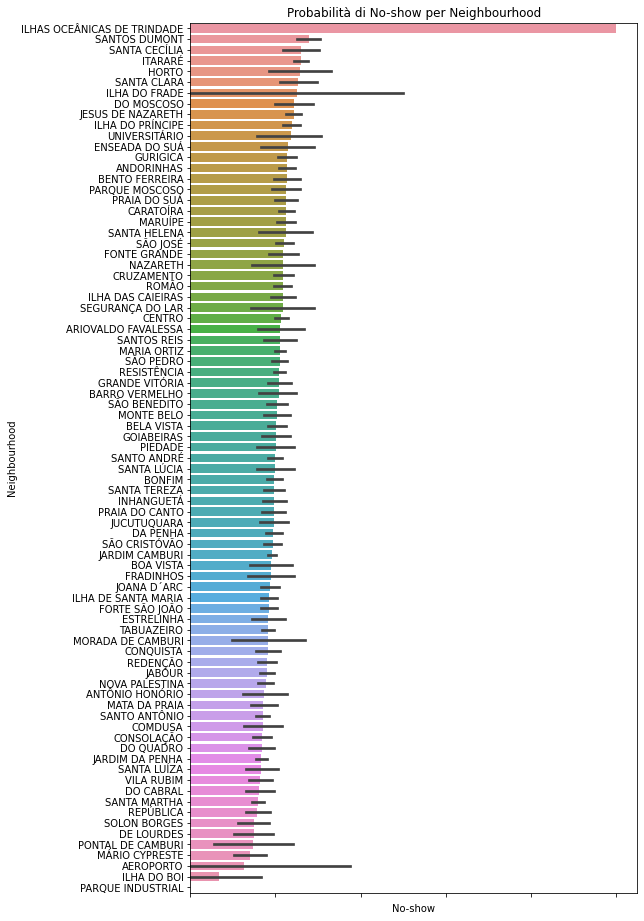

In [66]:
fig = plt.figure(figsize=(8,16))

ordered = app_edit[['Neighbourhood', 'No-show']].groupby(['Neighbourhood']).mean().sort_values(by='No-show', ascending=False)

g = sns.barplot(y='Neighbourhood', x='No-show', data=app_edit, order=ordered.index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title('Probabilità di No-show per Neighbourhood')

ordered

La funzione, mediante un threshold, riduce i possibili valori di neighbourhood trasformando quelli con meno frequenza (o mai apparsi) in 'Other'

In [67]:
neighbour_count = app_edit['Neighbourhood'].value_counts()

def neighbour_bin(name):
    if (not name in neighbour_count.index):
        return 'Other'
    elif (neighbour_count[name]) < 1500:
        return 'Other'
    else:
        return name

neighbour_bins = app_edit
neighbour_bins['Neighbour_bin'] = neighbour_bins['Neighbourhood'].apply(lambda n: neighbour_bin(n))

In [68]:
neighbour_bin('not_labeled')

'Other'

In [69]:
app_edit['Neighbourhood'] = neighbour_bins['Neighbour_bin']

### Provo a fare un label encoding (ordinale) dei neighbourhood

In [70]:
ordered

,No-show
Neighbourhood,
ILHAS OCEÂNICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.279455
SANTA CECÍLIA,0.260989
ITARARÉ,0.259786
HORTO,0.257353
...,...
PONTAL DE CAMBURI,0.148148
MÁRIO CYPRESTE,0.139456
AEROPORTO,0.125000


In [71]:
df_ordered = pd.DataFrame(data=ordered)
df_ordered = df_ordered.reset_index()

df_ordered

,Neighbourhood,No-show
0,ILHAS OCEÂNICAS DE TRINDADE,1.000000
1,SANTOS DUMONT,0.279455
2,SANTA CECÍLIA,0.260989
3,ITARARÉ,0.259786
4,HORTO,0.257353
...,...,...
76,PONTAL DE CAMBURI,0.148148
77,MÁRIO CYPRESTE,0.139456
78,AEROPORTO,0.125000
79,ILHA DO BOI,0.066667


In [72]:
df_ordered[df_ordered['Neighbourhood'] == 'JABOUR'].index[0]

60

Funzione utile per generare una colonna con i label ordinati per probabilità di No-show (decrescente)

In [73]:
def lookup_neighbour_order(name):
    return df_ordered[df_ordered['Neighbourhood'] == name].index[0]

In [83]:
lookup_neighbour_order('JABOUR')

60

In [84]:
#series_labeled = app_edit['Neighbourhood'].apply(lambda n: lookup_neighbour_order(n))
#series_labeled